In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

 ## Import Data

### Train

In [2]:
SAMPLE_SIZE = 20

In [49]:
# IMPORT DATA 

# data format: [gyro_x, gyro_y, gyro_z, accel_x, accel_y, accel_z]

def import_category_data(label, sample_size):
    name = str(label) + '_data'
    data = []
    for i in range(sample_size):
        f = './' + str(label) + '/data_' + str(i+1) + '_np.csv'
        data.append(pd.read_csv(f))
    return data

wave_Xs = import_category_data('wave', SAMPLE_SIZE)
swipe_Xs = import_category_data('swipe', SAMPLE_SIZE)
spin_Xs = import_category_data('spin', SAMPLE_SIZE)

wave_y =  np.full(SAMPLE_SIZE, 0)
swipe_y = np.full(SAMPLE_SIZE, 1)
spin_y = np.full(SAMPLE_SIZE, 2)


In [50]:
wave_Xs


[     8.843993000000000393e+01  5.804442999999999842e+01  \
 0                    93.81103                 40.466300   
 1                   113.34230                 -0.122070   
 2                    67.93213                -28.808590   
 3                   -53.28369                  1.831055   
 4                     9.94873                 84.350580   
 ..                        ...                       ...   
 282                 324.40180                 53.100580   
 283                -204.34570                 54.809570   
 284                  22.82715                 71.716310   
 285                 106.56740                 96.984850   
 286                  65.97900                 47.363280   
 
      1.763916000000000039e+01  3.769530999999999854e-01  \
 0                   -254.8218                  0.853394   
 1                   -458.4350                  2.173828   
 2                   -531.1279                  3.060425   
 3                   -526.0010        

### Test

In [51]:
# data format: [gyro_x, gyro_y, gyro_z, accel_x, accel_y, accel_z]
def import_category_data(label, sample_size, index):
    data = []
    f = './' + str(label) + '/data_' + str(index) + '_np.csv'
    data.append(pd.read_csv(f))
    return data

# import test data 
wave_testX = import_category_data('test', 1, 1)
swipe_testX  = import_category_data('test', 1, 5)
spin_testX  = import_category_data('test', 1, 8)

## Feature Engineering 

### train

In [68]:
# Take sd of one feature
def feature_engineering(d, sample_size):
    d_prime = np.full((sample_size,6), 0, float)
    for i in range(sample_size):
         d_prime[i] = np.std(d[i]).to_numpy()
    return d_prime


w = feature_engineering(wave_Xs, SAMPLE_SIZE)
sw = feature_engineering(swipe_Xs, SAMPLE_SIZE)
sp = feature_engineering(spin_Xs, SAMPLE_SIZE) 

In [69]:
wave_Xs[0].iloc[:, [1,2,3]]

,5.804442999999999842e+01,1.763916000000000039e+01,3.769530999999999854e-01
0,40.466300,-254.8218,0.853394
1,-0.122070,-458.4350,2.173828
2,-28.808590,-531.1279,3.060425
3,1.831055,-526.0010,2.934937
4,84.350580,-395.0805,2.199829
...,...,...,...
282,53.100580,512.1460,0.669189
283,54.809570,-291.8701,0.810181
284,71.716310,-377.0141,1.084595
285,96.984850,-358.4594,1.097900


In [70]:
aaaa = feature_engineering(wave_Xs[0].iloc[:, [1,2,3]], SAMPLE_SIZE)

KeyError: 0

In [71]:
# Concat Xs, y
t = np.append(w, sw)
Xs = np.append(t, sp).reshape(60, 6)

t = np.append(wave_y, swipe_y)
y = np.append(t, spin_y)

In [341]:
# scaler = preprocessing.StandardScaler().fit(Xs_)

In [7]:
# def select_salient_features(d, sample_size):
#     d_prime = np.full((sample_size,6), 0, float)
#     for i in range(sample_size):
#          d_prime[i] = np.std(d[i]).to_numpy()
#     return d_prime


# select gyro y, gyro z, accel x
Xs_ = Xs[:,[1,2,3]]
Xs_[:, 2] = Xs_[:, 2] * 100

Xs_

array([[125.25158447, 374.74729933,  94.25408326],
       [107.47796147, 353.72064526, 116.34606879],
       [112.79156813, 473.74280769, 123.17757779],
       [ 83.60918865, 318.90005104, 114.33411862],
       [ 82.82428549, 370.66508659, 100.81457986],
       [ 99.41347364, 407.2135523 , 103.73874091],
       [156.32703164, 456.77457554, 138.76585828],
       [140.55171633, 411.77649343, 122.36004038],
       [106.40021   , 336.64341112, 111.33943188],
       [132.21939205, 394.94993599,  93.52256406],
       [ 55.38669991, 283.06073624,  60.90055745],
       [ 68.50739293, 305.209348  ,  56.8878816 ],
       [131.46390701, 302.77806165,  85.57460281],
       [171.12115779, 322.67420613,  98.33228086],
       [171.82126063, 406.36912676, 110.55171642],
       [168.68286438, 442.18057873, 105.55901072],
       [155.12805081, 508.2824727 , 146.23754064],
       [121.3498713 , 438.25707554, 106.19684036],
       [140.59791191, 425.94313778,  99.41407903],
       [126.29217754, 419.33562

### Scale the Train Data

In [473]:
# scaler = preprocessing.StandardScaler().fit(Xs_)
# X_Train_scaled = scaler.transform(Xs_)

### test 

In [8]:
w_ = feature_engineering(wave_testX, 1)
sw_ = feature_engineering(swipe_testX, 1)
sp_ = feature_engineering(spin_testX, 1)

In [9]:
w_3 = w_[:,[1,2,3]]
sw_3 = sw_[:,[1,2,3]]
sp_3 = sp_[:,[1,2,3]]

In [10]:
w_3[:, 2] = w_3[:, 2] * 100
sw_3[:, 2] = sw_3[:, 2] * 100
sp_3[:, 2] = sp_3[:, 2] * 100

In [11]:
print(w_3)
print(sw_3)
print(sp_3)

[[ 35.99245196 229.81406114  41.62735382]]
[[320.61010555  60.40245273  54.37630234]]
[[ 81.15606487 108.86444415  28.36972221]]


In [428]:
# x_Test_scaled_w_3 = scaler.transform(w_3)
# x_Test_scaled_sw_3 = scaler.transform(sw_3)
# x_Test_scaled_sp_3 = scaler.transform(sp_3)

## Models

In [429]:
# SVC (linear)
mSVC = SVC(kernel='linear').fit(Xs, y)
mSVC_ = SVC(kernel='linear').fit(Xs_, y)

In [438]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(Xs_, y)
poly = SVC(kernel='poly', degree=3, C=1).fit(Xs_, y)

In [358]:
# mSVC = SVC(kernel='linear').fit(X_Train_scaled, y)
mSVC_ = SVC(kernel='linear').fit(X_Train_scaled, y)

In [12]:
# KNN
mKNN = KNeighborsClassifier(n_neighbors=3)
mKNN_ = mKNN.fit(Xs,y)
# mKNN__ = mKNN.fit(Xs_, y)

mKNN_

KNeighborsClassifier(n_neighbors=3)

(60, 6)

## Prediction

In [388]:
mSVC.predict(sp_.reshape(1,-1))

array([0])

In [432]:
mSVC_.predict(w_3.reshape(1,-1))

array([2])

In [445]:
poly.predict(sp_3.reshape(1,-1))

array([0])

In [361]:
mSVC_.predict(x_Test_scaled_sp_3.reshape(1,-1))

array([1])

In [259]:
w_.shape

(1, 6)

In [257]:
Xs.shape

(60, 6)

In [448]:
# # mKNN_.predict(w_.squeeze())

# mKNN_.predict(np.zeros((60,1)))

# np.random.rand(1,60)

In [ ]:
def predict_model(model,data):
     data = np.array(data)
     if np.any(np.isnan(data)) or np.any(np.isinf(data)):
          return 0
     return model.predict(data.reshape(1,-1))[0]

## Helper Functions

In [ ]:
gyro_x = wave_data[0].iloc[:, 0].values
gyro_y = wave_data[0].iloc[:, 1].values
gyro_z = wave_data[0].iloc[:, 2].values
accel_x = wave_data[0].iloc[:, 3].values
accel_y = wave_data[0].iloc[:, 4].values
accel_z = wave_data[0].iloc[:, 5].values


def check_data_pattern(d):
    x = np.linspace(0, len(d), len(d))
    y = d

    plt.plot(x, y, 'o', color='black')

In [446]:
def plot_sets_3d(Xs, ys):
    """Plots a 3-dimensional (X), 3-class (y) data-set."""
    axes = plt.axes(projection='3d')
        
    X0, X1, X2 = Xs[ys==0], Xs[ys==1], Xs[ys==2], 
    axes.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='blue', s=50)
    axes.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='red', s=50, marker='D')
    axes.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c='green', s=50, marker='D')

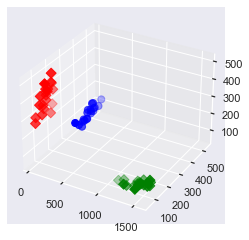

In [447]:
 plot_sets_3d(Xs, y)

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(Xs_, y)
ypred=knn_clf.predict(w_3)
ypred

array([0])

In [ ]:
# sp - 0 
# sw - 1
# w - 2